In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
print('Pandas version: ', pd.__version__)
print('Numpy version: ', np.__version__)

2022-07-27 18:32:11.908433: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-27 18:32:11.908473: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Pandas version:  1.4.3
Numpy version:  1.23.0


In [2]:
data=pd.read_csv('final_df.csv')
data.head()

,Unnamed: 0,交易年份,屋齡,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,電梯,HOSPITAL_COUNT,CSTORE_COUNT,NEAR_UNIVERSITY,...,NEAR_FUEL,NEAR_LIBRARY,NEAR_MARKET,PARK_AREA,PARKING_AREA,TEMPLE_COUNT,NEAR_POLICE,NEAR_SCHOOL,NEAR_STATION,單價元平方公尺
0,0,111,39,3,2,2,1,21.0,19.0,0.0,...,1.0,1.0,1.0,72085.785107,32795.006527,5,1.0,1.0,0.0,177928
1,1,111,38,3,2,1,0,46.0,23.0,0.0,...,1.0,0.0,1.0,7282.581500,7042.418823,8,1.0,1.0,1.0,293629
2,2,111,51,3,2,2,0,13.0,14.0,0.0,...,0.0,1.0,0.0,7010.772433,7515.068723,5,1.0,1.0,0.0,163067
3,3,111,57,4,2,2,0,18.0,23.0,0.0,...,0.0,1.0,0.0,5124.603136,9466.999924,7,0.0,1.0,0.0,323197
4,4,111,21,1,1,1,1,71.0,27.0,0.0,...,1.0,1.0,1.0,14111.007334,6156.016350,16,1.0,1.0,1.0,279013


In [3]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.dtypes

交易年份                  int64
屋齡                    int64
建物現況格局-房              int64
建物現況格局-廳              int64
建物現況格局-衛              int64
電梯                    int64
HOSPITAL_COUNT      float64
CSTORE_COUNT        float64
NEAR_UNIVERSITY     float64
NEAR_FIRESTATION    float64
NEAR_FUEL           float64
NEAR_LIBRARY        float64
NEAR_MARKET         float64
PARK_AREA           float64
PARKING_AREA        float64
TEMPLE_COUNT          int64
NEAR_POLICE         float64
NEAR_SCHOOL         float64
NEAR_STATION        float64
單價元平方公尺               int64
dtype: object

In [4]:
data = data.sample(frac=1.0)
data = data.reset_index()
train_data = data.sample(frac=0.8)
train_data

,index,交易年份,屋齡,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,電梯,HOSPITAL_COUNT,CSTORE_COUNT,NEAR_UNIVERSITY,...,NEAR_FUEL,NEAR_LIBRARY,NEAR_MARKET,PARK_AREA,PARKING_AREA,TEMPLE_COUNT,NEAR_POLICE,NEAR_SCHOOL,NEAR_STATION,單價元平方公尺
867,384,110,38,1,1,1,0,64.0,29.0,0.0,...,1.0,0.0,1.0,9238.309468,11047.284705,11,1.0,1.0,1.0,202368
539,43,111,38,2,2,1,1,76.0,39.0,0.0,...,1.0,1.0,1.0,15084.285361,8377.677287,26,1.0,1.0,1.0,159473
986,392,110,25,2,1,1,1,69.0,38.0,0.0,...,1.0,0.0,0.0,50607.784073,25022.884120,17,1.0,1.0,0.0,200617
858,673,110,39,1,1,1,1,83.0,43.0,0.0,...,0.0,1.0,1.0,22041.377244,8377.677283,27,1.0,1.0,1.0,206057
150,236,111,41,2,1,1,1,44.0,20.0,1.0,...,1.0,0.0,1.0,6404.449815,8325.941313,11,1.0,1.0,1.0,238312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,101,111,43,1,0,1,1,74.0,38.0,0.0,...,1.0,0.0,1.0,24722.536835,8377.677287,27,1.0,1.0,1.0,181571
696,176,111,41,0,0,0,1,53.0,39.0,0.0,...,0.0,1.0,1.0,9327.368972,5973.154076,16,1.0,1.0,1.0,191114
570,791,110,42,1,1,1,0,66.0,44.0,0.0,...,0.0,1.0,1.0,56869.502235,28536.929630,14,1.0,1.0,1.0,212466
1102,297,111,44,3,2,2,0,28.0,18.0,0.0,...,1.0,0.0,1.0,72868.723618,32890.809656,5,0.0,1.0,0.0,171126


In [5]:
data2 = data[~data.index.isin(train_data.index)]

In [6]:
val_data = data2.sample(frac=0.5)
test_data = data2[~data2.index.isin(val_data.index)]

In [7]:
train_data.drop(['index'],axis=1,inplace=True)
val_data.drop(['index'],axis=1,inplace=True)
test_data.drop(['index'],axis=1,inplace=True)

/tmp/ipykernel_4039/2386914992.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop(['index'],axis=1,inplace=True)


In [14]:
train_validation_data = pd.concat([train_data, val_data])
mean = train_validation_data.mean()
std = train_validation_data.std()
train_data = (train_data-mean)/std
val_data = (val_data -mean)/std

In [15]:
X_data = np.array(train_data[train_data.columns[0:20]])
y_data = np.array(train_data[train_data.columns[-1]]).reshape(len(train_data),1)
X_val = np.array(val_data[val_data.columns[0:20]])
y_val = np.array(val_data[val_data.columns[-1]]).reshape(len(val_data),1)

print(X_data.shape,type(X_data))
print(y_data.shape,type(y_data))

(949, 20) <class 'numpy.ndarray'>
(949, 1) <class 'numpy.ndarray'>


In [16]:
model = tf.keras.Sequential()
model.add(keras.layers.Dense(14, activation='relu', input_shape=(20,))) 
model.add(keras.layers.Dense(14, activation='relu'))
model.add(keras.layers.Dense(1)) 

2022-07-27 18:37:05.305921: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-27 18:37:05.305957: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-27 18:37:05.305975: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ubuntuosmnx-virtual-machine): /proc/driver/nvidia/version does not exist
2022-07-27 18:37:05.306674: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
model.compile(keras.optimizers.Adam(0.001),
loss=keras.losses.MeanSquaredError(),
metrics=[keras.metrics.MeanAbsoluteError()])

In [18]:
model_mckp=keras.callbacks.ModelCheckpoint('test_model-1.h5',
monitor='val_mean_absolute_error',
save_best_only=True,
mode='min')

In [19]:
model_cbk=keras.callbacks.TensorBoard()
history = model.fit(X_data, y_data,
batch_size=14,  
epochs=300, 
validation_data=(X_val, y_val),  
callbacks=[model_cbk, model_mckp])

Epoch 1/300
68/68 [==============================] - 1s 4ms/step - loss: 0.9150 - mean_absolute_error: 0.6995 - val_loss: 0.5594 - val_mean_absolute_error: 0.5003
Epoch 2/300
68/68 [==============================] - 0s 2ms/step - loss: 0.4967 - mean_absolute_error: 0.4669 - val_loss: 0.4266 - val_mean_absolute_error: 0.4089
Epoch 3/300
68/68 [==============================] - 0s 2ms/step - loss: 0.3794 - mean_absolute_error: 0.3994 - val_loss: 0.3322 - val_mean_absolute_error: 0.3591
Epoch 4/300
68/68 [==============================] - 0s 2ms/step - loss: 0.2958 - mean_absolute_error: 0.3510 - val_loss: 0.2813 - val_mean_absolute_error: 0.3328
Epoch 5/300
68/68 [==============================] - 0s 2ms/step - loss: 0.2315 - mean_absolute_error: 0.3184 - val_loss: 0.2261 - val_mean_absolute_error: 0.3095
Epoch 6/300
68/68 [==============================] - 0s 2ms/step - loss: 0.1853 - mean_absolute_error: 0.2900 - val_loss: 0.1944 - val_mean_absolute_error: 0.2972
Epoch 7/300
68/68 [===

In [20]:
import matplotlib.pyplot as plt

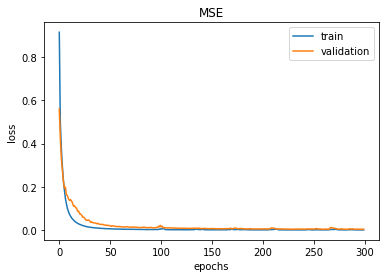

In [21]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('MSE')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='best')

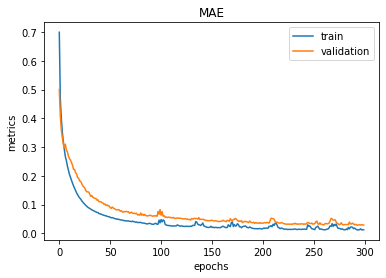

In [22]:
plt.plot(history.history['mean_absolute_error'], label='train')
plt.plot(history.history['val_mean_absolute_error'], label='validation')
plt.title('MAE')
plt.ylabel('metrics')
plt.xlabel('epochs')
plt.legend(loc='best')

In [23]:
model = keras.models.load_model('test_model-1.h5')
y_test = np.array(test_data[test_data.columns[-1]]).reshape(len(test_data),1)
test_data = (test_data - mean) / std
x_test = np.array(test_data[test_data.columns[0:20]])
y_pred = model.predict(x_test)
y_pred = np.reshape(y_pred * std['單價元平方公尺'] + mean['單價元平方公尺'], y_test.shape)
percentage_error = np.mean(np.abs(y_test - y_pred)) / np.mean(y_test) * 100
print("Model Percentage Error: {:.2f}%".format(percentage_error))

4/4 [==============================] - 0s 1ms/step
Model Percentage Error: 0.87%


In [28]:
print(type(y_test))
print(type(y_pred))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
